### Envelope generation by following icassp - vlaai steps


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import json
import glob
import os
from AudioOnsetUtils import *

In [3]:
PNUM = "14"

In [4]:
file_path = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/eeg/64_InputChannels/Sub" + PNUM + "/P" + PNUM +"-formatted.json"
with open(file_path, 'r') as json_file:
    # Use the json.load() method to parse the JSON data into a Python dictionary
    event_eeg_dict = json.load(json_file)

In [5]:
event_eeg_dict.keys()

dict_keys(['e0_s12_c1', 'e1_s12_c2', 'e2_s12_c3', 'e3_s3_c1', 'e4_s3_c2', 'e5_s3_c3', 'e6_s23_c1', 'e7_s23_c2', 'e8_s13_c1', 'e9_s13_c2', 'e10_s13_c3', 'e11_s14_c1', 'e12_s14_c3', 'e13_s11_c1', 'e14_s11_c3', 'e15_s1_c1', 'e16_s1_c2', 'e17_s1_c3', 'e18_s2_c1', 'e19_s2_c2', 'e20_s4_c1', 'e21_s4_c2', 'e22_s21_c1', 'e23_s21_c2', 'e24_s21_c3', 'e25_s22_c1', 'e26_s22_c2', 'e27_s22_c3', 'e28_s24_c1', 'e29_s22_c1', 'e30_s22_c2', 'e31_s22_c3', 'e32_s4_c1', 'e33_s4_c3', 'e34_s11_c1', 'e35_s11_c2', 'e36_s2_c1', 'e37_s2_c2', 'e38_s21_c1', 'e39_s21_c2', 'e40_s13_c1', 'e41_s13_c2', 'e42_s13_c3', 'e43_s3_c1', 'e44_s3_c3', 'e45_s23_c1', 'e46_s23_c3', 'e47_s12_c1', 'e48_s12_c2', 'e49_s12_c3', 'e50_s24_c1', 'e51_s24_c2', 'e52_s1_c1', 'e53_s1_c2', 'e54_s1_c3', 'e55_s14_c1', 'e56_s14_c3', 'e57_s14_c1', 'e58_s22_c1', 'e59_s22_c2', 'e60_s22_c3', 'e61_s23_c1', 'e62_s23_c2', 'e63_s23_c3', 'e64_s12_c1', 'e65_s12_c2', 'e66_s12_c3', 'e67_s21_c1', 'e68_s21_c3', 'e69_s4_c1', 'e70_s4_c3', 'e71_s11_c1', 'e72_s11_c3'

In [7]:
for key, value in event_eeg_dict.items():
  if key.split('_')[1] == 's13':
    print(key, len(value))
# each condition 5 trials

e8_s13_c1 618
e9_s13_c2 618
e10_s13_c3 618
e40_s13_c1 618
e41_s13_c2 618
e42_s13_c3 618
e76_s13_c1 618


In [18]:
#stimuli
v2_path ="/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/full.v2"
v1_path="/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/full.v1"
# Load the audio file
# file_path = "S01_Chim Chim Cheree_lyrics.wav"


In [19]:
from scipy.signal import gammatone

# Function to create the gammatone filterbank
def create_gammatone_filterbank(num_filters, sample_rate, f_min, f_max):
    filterbank = []
    center_frequencies = np.logspace(np.log10(f_min), np.log10(f_max), num_filters)
    equivalent_rectangular_bandwidth = 1.019 * 24.7 / (0.00437 * center_frequencies + 1.0)
    for center_freq, bandwidth in zip(center_frequencies, equivalent_rectangular_bandwidth):
        b = 1.019 * 24.7 * (4.37 * center_freq / 1000 + 1)
        filterbank.append(gammatone(center_freq, ftype='fir', order=4, fs =sample_rate))

    return filterbank

# Sample parameters
num_filters = 28
sample_rate = 44100  # Change this to your actual sample rate
f_min = 50  # Minimum center frequency
f_max = 5000  # Maximum center frequency




s11_v1


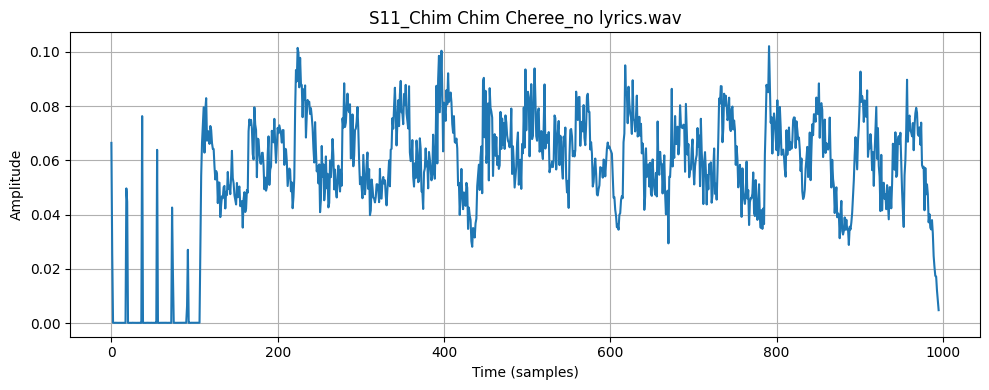

s12_v1


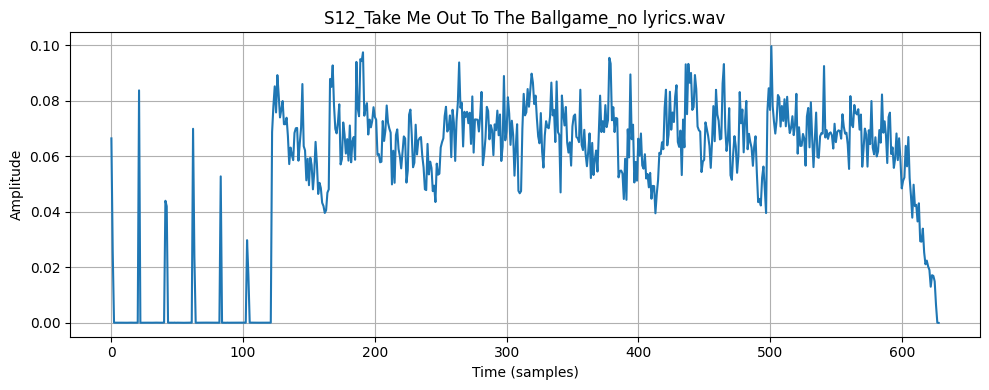

s22_v1


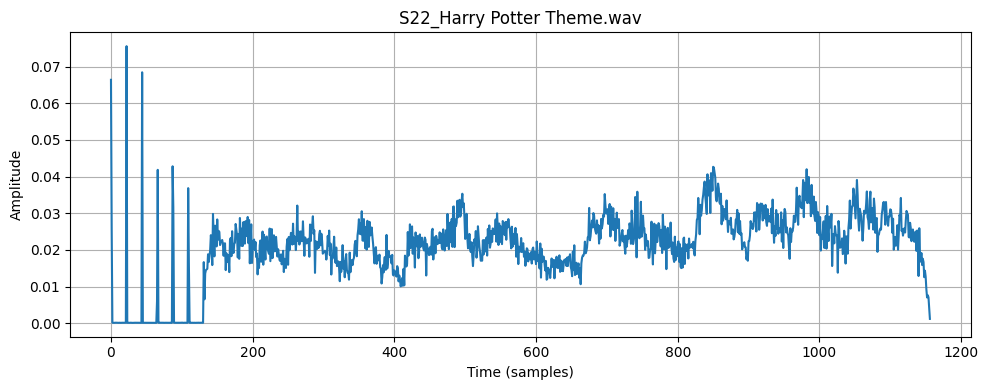

s2_v1


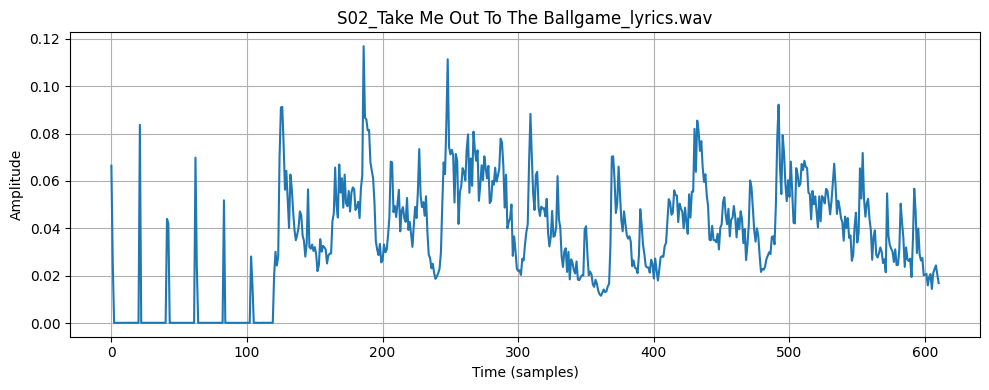

s1_v1


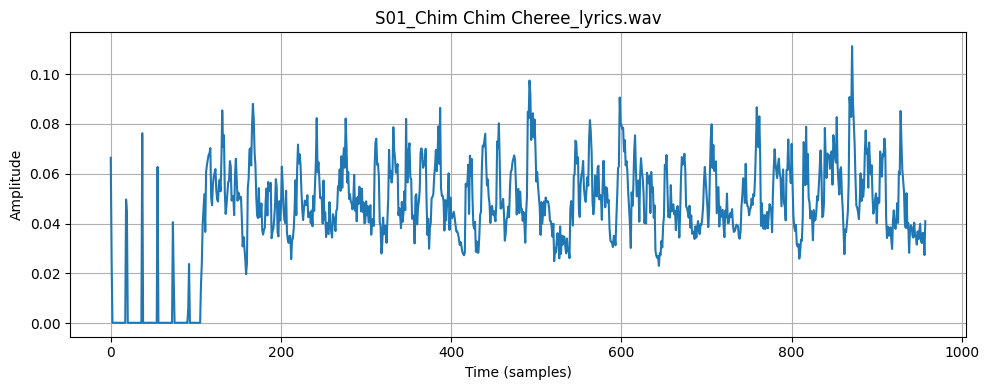

In [23]:
wav_files = glob.glob(os.path.join(v1_path, '*.wav'))
all_envelopes = {}
for song in wav_files:
  # print(song)
  song_signal, sample_rate = librosa.load(song, sr=None)
  # print(type(song_signal), type(sample_rate),sample_rate)
  # Create the gammatone filterbank
  filterbank = create_gammatone_filterbank(num_filters, sample_rate, f_min, f_max)

  # Generate a sample speech signal (replace this with your own audio data)
  # speech_signal = np.random.randn(44100)  # Example random signal, change this

  # Apply the filterbank to the speech signal
  filtered_signals = [np.abs(np.convolve(song_signal, filter[0]/filter[1], mode='same')) ** 0.6 for filter in filterbank]

  # Calculate the mean of all filters
  song_envelope = np.mean(filtered_signals, axis=0)


  # Downsample to 64 Hz (adjust as needed)
  downsample_factor = int(sample_rate / 64)
  song_envelope_downsampled = song_envelope[::downsample_factor]
  # print(type(song_envelope_downsampled[0]), song_envelope_downsampled.shape)
  # Now, speech_envelope_downsampled contains the downsampled speech stimulus envelope
  song_name = song.split('/')[-1]
  song_id = song_name.split('_')[0]
  if int(song_id[1]) == 0:
    song_id = 's' + song_id[2] + '_v1'
  else:
    song_id = song_id.lower() + '_v1'

  print(song_id)
  all_envelopes[song_id] = song_envelope_downsampled.tolist()

  plt.figure(figsize=(10, 4))
  plt.plot(song_envelope_downsampled)
  plt.xlabel('Time (samples)')
  plt.ylabel('Amplitude')
  plt.title(song.split('/')[-1])
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [24]:
for key, value in all_envelopes.items():
  print(key)

s11_v1
s12_v1
s22_v1
s2_v1
s1_v1


In [25]:
file_path = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/pretrained_vlaai_envelope/v1_and_v2.json"
# os.makedirs(prediction_dir, exist_ok=True)

with open(file_path, 'r') as file_x:
    existing_data = json.load(file_x)

# Step 2: Append or update the data in memory
existing_data.update(all_envelopes)


for key, value in existing_data.items():
  print(key)



s22_v2
s3_v2
s4_v2
s14_v2
s12_v2
s24_v2
s21_v2
s11_v2
s1_v2
s2_v2
s23_v2
s13_v2
s11_v1
s12_v1
s22_v1
s2_v1
s1_v1


In [27]:
# Step 3: Write the updated JSON data back to the file
file_path = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/pretrained_vlaai_envelope/v1_and_v2.json"
with open(file_path, 'w') as file_y:
    json.dump(existing_data, file_y)

### Clipping & Padding


In [28]:
file_path = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/pretrained_vlaai_envelope/v1_and_v2.json"
with open(file_path, 'r') as json_file:
    # Use the json.load() method to parse the JSON data into a Python dictionary
    mega_envelope_dict = json.load(json_file)

In [29]:
mega_envelope_dict.keys()

dict_keys(['s22_v2', 's3_v2', 's4_v2', 's14_v2', 's12_v2', 's24_v2', 's21_v2', 's11_v2', 's1_v2', 's2_v2', 's23_v2', 's13_v2', 's11_v1', 's12_v1', 's22_v1', 's2_v1', 's1_v1'])

In [30]:
for key, value in mega_envelope_dict.items():
  # no of smaples = value/64
  print(len(value))

1164
767
936
974
618
656
661
968
957
609
739
725
996
629
1157
611
958


In [31]:
def cue_clipping(envelope, eeg_len):
  return envelope[len(envelope)-eeg_len:]

In [33]:
# def find_eeg_len(song_id, event_eeg_dict):
#   print("song_id ",song_id)
#   for key, value in event_eeg_dict.items():
#     print("key.split('_')[1] ",key.split('_')[1])
#     if key.split('_')[1] == song_id:
#       return len(value)


def find_eeg_len(new_key):
  subjects_v1 = ['01','04','06','07']
  subjects_v2 = ['09','11','12','13', '14']
  song_id, version = new_key.split('_')
  # print(song_id, version)
  if version == 'v1':
    subjects = subjects_v1
  else:
    subjects = subjects_v2

  for subject in subjects:
    print("searching for song_id ", song_id," of ",version, " in subject ",subject)
    file_path = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/eeg/64_InputChannels/Sub" + subject + "/P" + subject +".json"
    with open(file_path, 'r') as json_file:
        # Use the json.load() method to parse the JSON data into a Python dictionary
        event_eeg_dict = json.load(json_file)

    for key, value in event_eeg_dict.items():
      # print("key.split('_')[1] ",key.split('_')[1])
      if key.split('_')[1] == song_id:
        print('found!!!!!!')
        print()
        return len(value)
    print(' not found :(, next subject')
    print()

In [34]:
def clipping(no_of_samples, song_envelope):
  return song_envelope[:no_of_samples]

In [35]:
def padding(no_of_samples, song_envelope,mode):
  right_padding = no_of_samples-len(song_envelope)
  song_envelope_array = np.array(song_envelope)
  padded_array = np.pad(song_envelope_array, (0, right_padding), mode=mode)
  return padded_array.tolist()

In [36]:
no_of_samples=618
mode = "symmetric"
padded_clipped_song={}

In [37]:
# file_path = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/eeg/64_InputChannels/Sub" + PNUM + "/P" + PNUM +"-formatted.json"
# with open(file_path, 'r') as json_file:
#     # Use the json.load() method to parse the JSON data into a Python dictionary
#     event_eeg_dict = json.load(json_file)


for key, song in mega_envelope_dict.items():
  # song_id = key.split('_')[0]
  # if PNUM in ['01','04','06','07'] and song_id in ['s1', 's2', 's11', 's12', 's22']:
  #   new_key = song_id +'_v1'
  # else:
  #   new_key = song_id + '_v2'
  envelope = mega_envelope_dict[key]
  eeg_len = find_eeg_len(key)
  print("eeg_len ",eeg_len)
  if eeg_len is not None:
    song_envelope = cue_clipping(envelope, eeg_len)


    if(len(song_envelope)<no_of_samples):
      padded_clipped_song[key]=padding(no_of_samples,song_envelope,mode)
    elif(len(song_envelope)>no_of_samples):
      padded_clipped_song[key]=clipping(no_of_samples,song_envelope)
    else:
      padded_clipped_song[key]=song_envelope


searching for song_id  s22  of  v2  in subject  09
found!!!!!!

eeg_len  1024
searching for song_id  s3  of  v2  in subject  09
found!!!!!!

eeg_len  618
searching for song_id  s4  of  v2  in subject  09
found!!!!!!

eeg_len  744
searching for song_id  s14  of  v2  in subject  09
found!!!!!!

eeg_len  783
searching for song_id  s12  of  v2  in subject  09
found!!!!!!

eeg_len  498
searching for song_id  s24  of  v2  in subject  09
found!!!!!!

eeg_len  440
searching for song_id  s21  of  v2  in subject  09
found!!!!!!

eeg_len  533
searching for song_id  s11  of  v2  in subject  09
found!!!!!!

eeg_len  862
searching for song_id  s1  of  v2  in subject  09
found!!!!!!

eeg_len  852
searching for song_id  s2  of  v2  in subject  09
found!!!!!!

eeg_len  491
searching for song_id  s23  of  v2  in subject  09
found!!!!!!

eeg_len  591
searching for song_id  s13  of  v2  in subject  09
found!!!!!!

eeg_len  573
searching for song_id  s11  of  v1  in subject  01
found!!!!!!

eeg_len  889
se

In [38]:
for key,value in padded_clipped_song.items():
  print(key," ",len(value))

s22_v2   618
s3_v2   618
s4_v2   618
s14_v2   618
s12_v2   618
s24_v2   618
s21_v2   618
s11_v2   618
s1_v2   618
s2_v2   618
s23_v2   618
s13_v2   618
s11_v1   618
s12_v1   618
s22_v1   618
s2_v1   618
s1_v1   618


In [39]:
file_path = "/content/drive/MyDrive/CAPSTONE_626_645_648_651/Data/OpenMIIR/audio/pretrained_vlaai_envelope/audio-envelope-formatted.json"
# os.makedirs(prediction_dir, exist_ok=True)
with open(file_path, 'w') as file_x:
  json.dump(padded_clipped_song, file_x)